# 1. Importing necessary libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/kunal/Downloads/Superstore.csv', encoding='latin1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 2. Understanding the Structure of the Dataset

In [4]:
# Check the dimensions of the DataFrame
print("Dimensions of the DataFrame:", df.shape)

Dimensions of the DataFrame: (9994, 21)


In [5]:
# Check the data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [6]:
# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [7]:
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


# 3. Exploratory Data Analysis (EDA)

### 3.1 Distribution of sales and profit

In [8]:
# Displaying some data related to the bar plots
print("\nData related to the sales and profit distributions:")
print(df[['Sales', 'Profit']].head(10))


Data related to the sales and profit distributions:
      Sales    Profit
0  261.9600   41.9136
1  731.9400  219.5820
2   14.6200    6.8714
3  957.5775 -383.0310
4   22.3680    2.5164
5   48.8600   14.1694
6    7.2800    1.9656
7  907.1520   90.7152
8   18.5040    5.7825
9  114.9000   34.4700


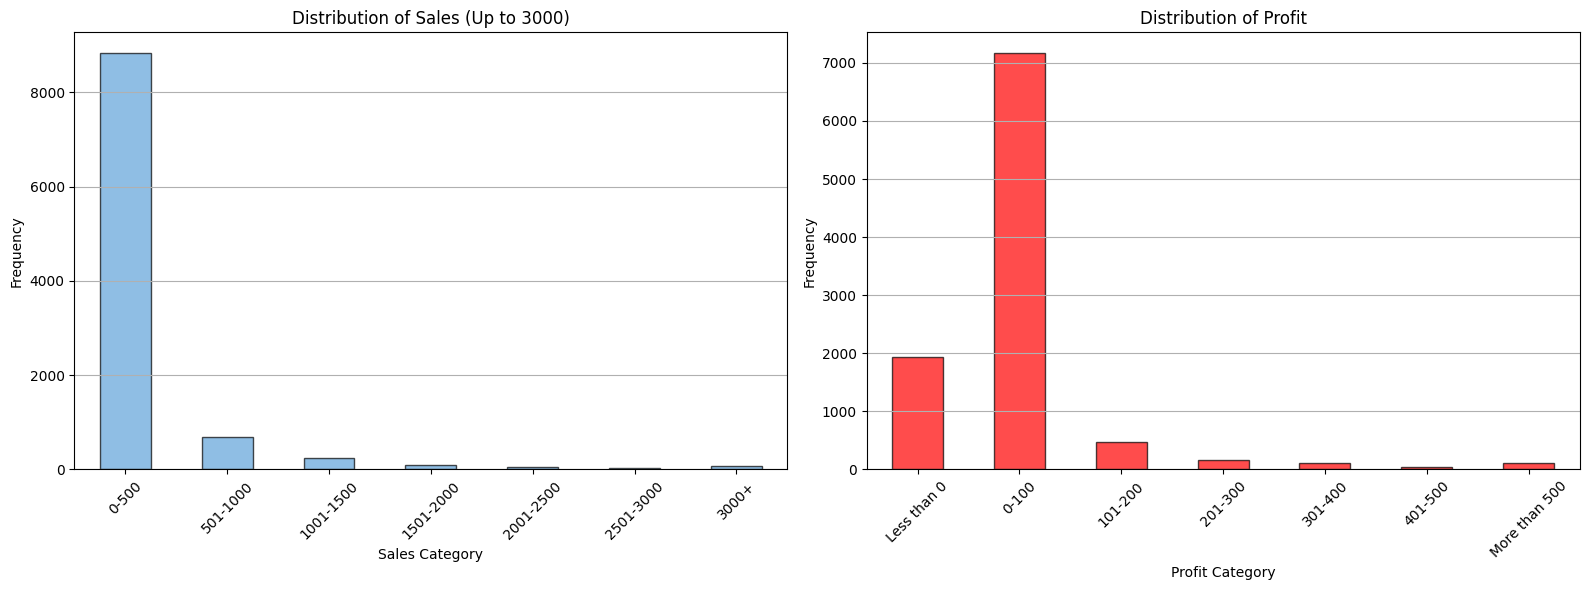

In [9]:
# Define bins for sales categories
sales_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, np.inf]
sales_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3000+']

# Bin the sales values into categories
df['Sales Category'] = pd.cut(df['Sales'], bins=sales_bins, labels=sales_labels, right=False)

# Group the data by sales category and count the number of occurrences
sales_distribution = df['Sales Category'].value_counts().sort_index()

# Define bins for profit categories
profit_bins = [-np.inf, 0, 100, 200, 300, 400, 500, np.inf]
profit_labels = ['Less than 0', '0-100', '101-200', '201-300', '301-400', '401-500', 'More than 500']

# Bin the profit values into categories
df['Profit Category'] = pd.cut(df['Profit'], bins=profit_bins, labels=profit_labels)

# Group the data by profit category and count the number of occurrences
profit_distribution = df['Profit Category'].value_counts().sort_index()

# Create subplots for side-by-side bar plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot bar plot for the distribution of Sales
sales_distribution.plot(kind='bar', color='#60A3D9', alpha=0.7, edgecolor='black', ax=axes[0])
axes[0].set_title('Distribution of Sales (Up to 3000)')
axes[0].set_xlabel('Sales Category')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(sales_distribution.index, rotation=45)
axes[0].grid(axis='y')

# Plot bar plot for the distribution of Profit
profit_distribution.plot(kind='bar', color='red', alpha=0.7, edgecolor='black', ax=axes[1])
axes[1].set_title('Distribution of Profit')
axes[1].set_xlabel('Profit Category')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(profit_distribution.index, rotation=45)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

### 3.2 Distribution of Quantity and Discount

In [10]:
# Displaying some data related to the histograms
print("Data related to the histograms:")
print(df[['Quantity', 'Discount']].head(10))

Data related to the histograms:
   Quantity  Discount
0         2      0.00
1         3      0.00
2         2      0.00
3         5      0.45
4         2      0.20
5         7      0.00
6         4      0.00
7         6      0.20
8         3      0.20
9         5      0.00


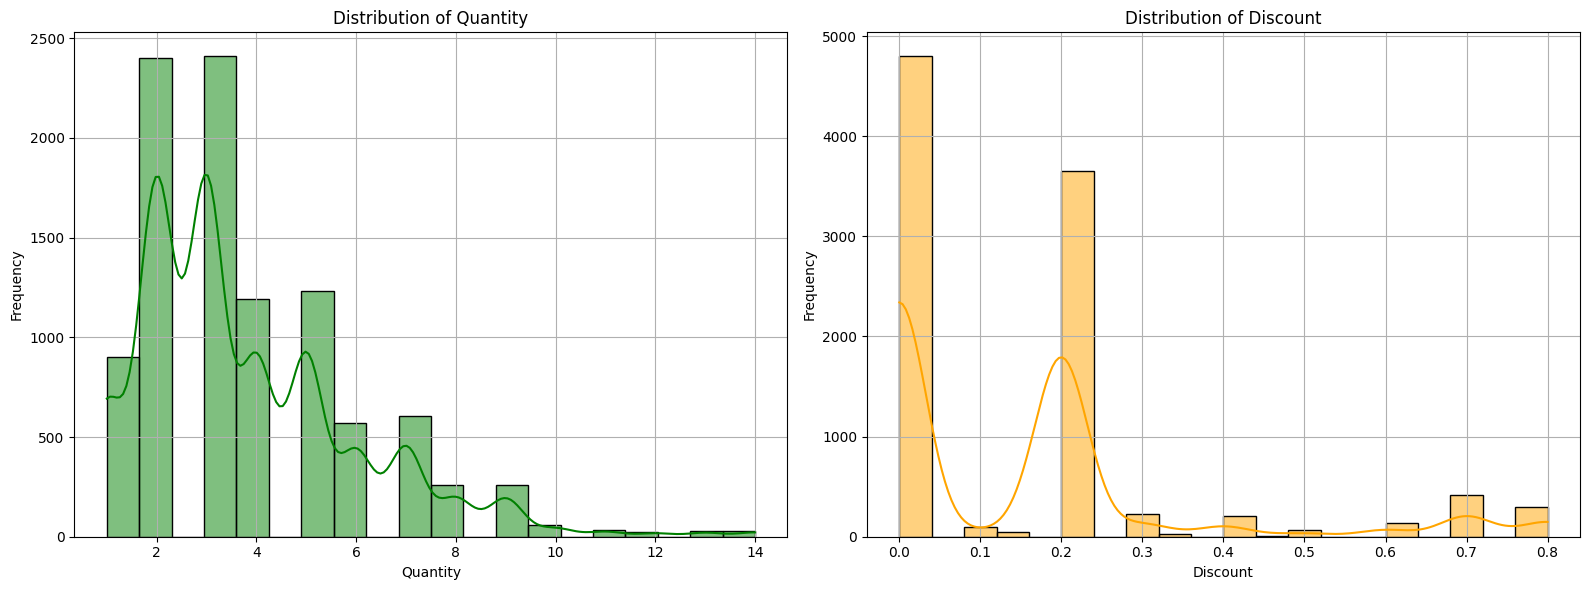

In [11]:
# Create subplots for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot histogram for the distribution of Quantity
sns.histplot(df['Quantity'], bins=20, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution of Quantity')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot histogram for the distribution of Discount
sns.histplot(df['Discount'], bins=20, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribution of Discount')
axes[1].set_xlabel('Discount')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 3.3 Distribution of Products by category

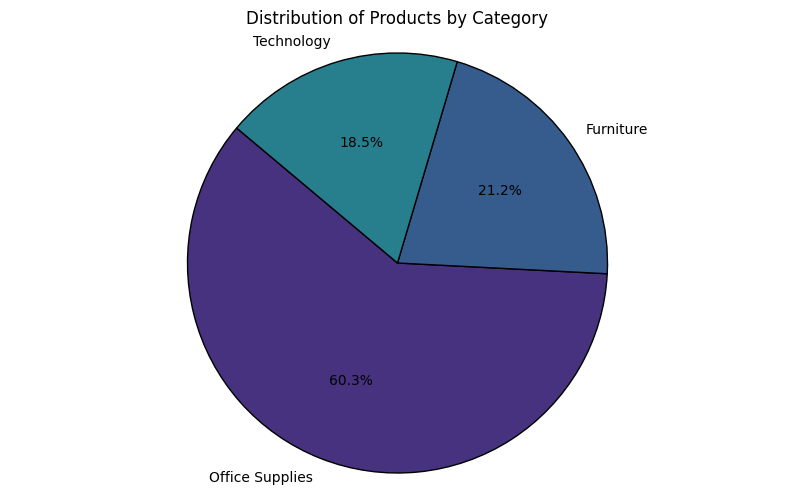

In [12]:
category_distribution = df['Category'].value_counts()
# Plot pie chart for the distribution of Category
plt.figure(figsize=(10, 6))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Products by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### 3.4 Distribution of Customers by segment

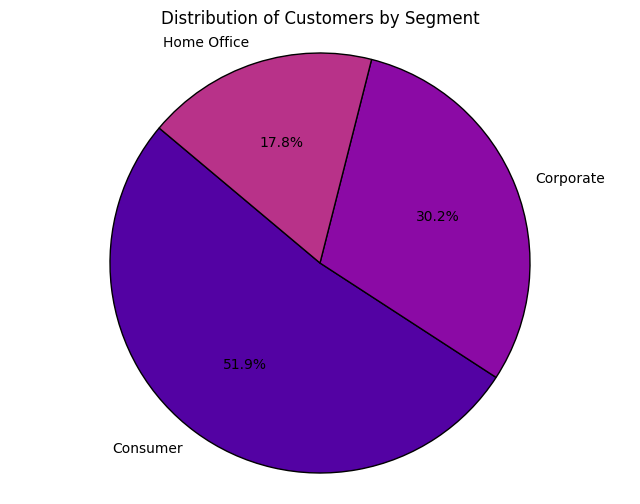

In [13]:
segment_distribution = df['Segment'].value_counts()
# Plot pie chart for the distribution of Segment
plt.figure(figsize=(8, 6))
plt.pie(segment_distribution, labels=segment_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('plasma'), startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Customers by Segment')
plt.axis('equal')
plt.show()

### 3.5 Scatter plots for numerical variables

In [14]:
# Displaying some data related to the scatter plots
print("Data related to the scatter plots:")
print(df[['Sales', 'Profit', 'Quantity', 'Discount']].head(10))

Data related to the scatter plots:
      Sales    Profit  Quantity  Discount
0  261.9600   41.9136         2      0.00
1  731.9400  219.5820         3      0.00
2   14.6200    6.8714         2      0.00
3  957.5775 -383.0310         5      0.45
4   22.3680    2.5164         2      0.20
5   48.8600   14.1694         7      0.00
6    7.2800    1.9656         4      0.00
7  907.1520   90.7152         6      0.20
8   18.5040    5.7825         3      0.20
9  114.9000   34.4700         5      0.00


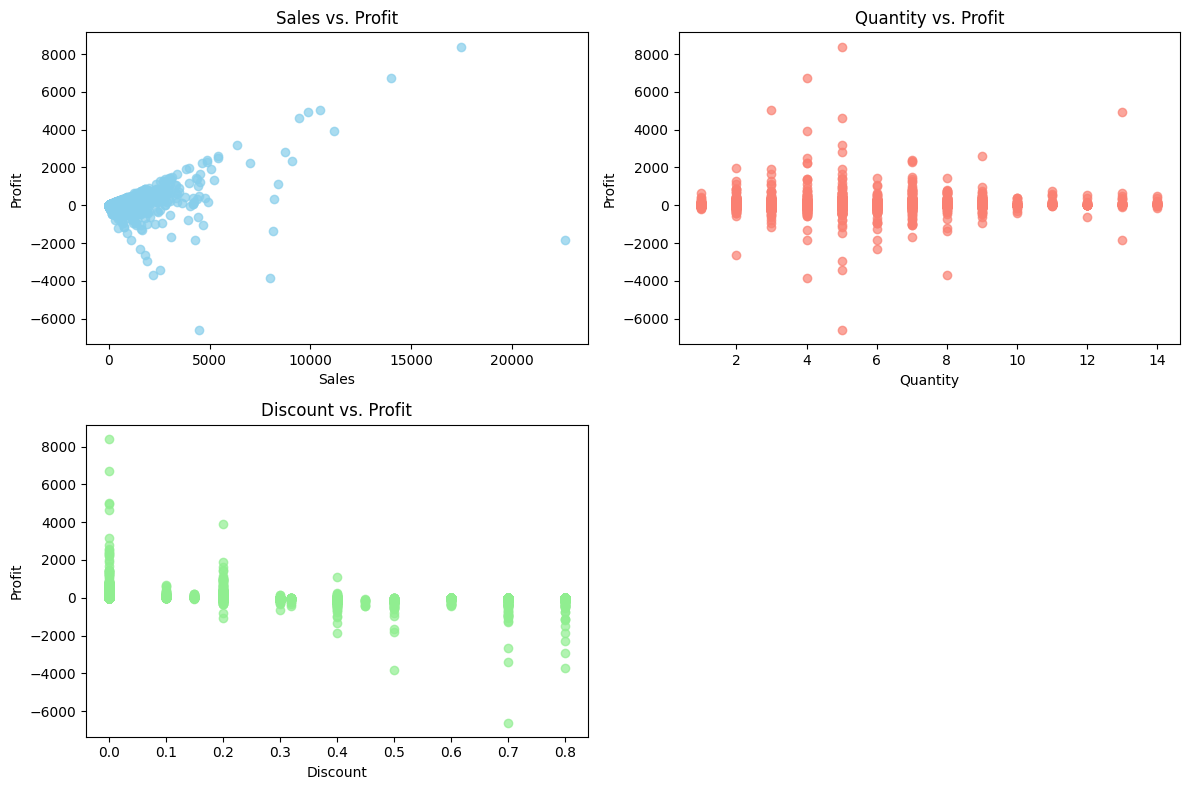

In [15]:
# Create scatter plots for numerical variables
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(df['Sales'], df['Profit'], color='skyblue', alpha=0.7)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

plt.subplot(2, 2, 2)
plt.scatter(df['Quantity'], df['Profit'], color='salmon', alpha=0.7)
plt.title('Quantity vs. Profit')
plt.xlabel('Quantity')
plt.ylabel('Profit')

plt.subplot(2, 2, 3)
plt.scatter(df['Discount'], df['Profit'], color='lightgreen', alpha=0.7)
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

### 3.6 Average delivery time

In [18]:
# Displaying some data related to the visualization
print("Data related to the average delivery time visualization:")
print(df[['Order Date', 'Ship Date', 'Ship Mode']].head(10))

Data related to the average delivery time visualization:
  Order Date  Ship Date       Ship Mode
0 2016-11-08 2016-11-11    Second Class
1 2016-11-08 2016-11-11    Second Class
2 2016-06-12 2016-06-16    Second Class
3 2015-10-11 2015-10-18  Standard Class
4 2015-10-11 2015-10-18  Standard Class
5 2014-06-09 2014-06-14  Standard Class
6 2014-06-09 2014-06-14  Standard Class
7 2014-06-09 2014-06-14  Standard Class
8 2014-06-09 2014-06-14  Standard Class
9 2014-06-09 2014-06-14  Standard Class


In [19]:
# Convert 'Order Date' and 'Ship Date' columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate delivery time for each order
df['Delivery Time'] = df['Ship Date'] - df['Order Date']

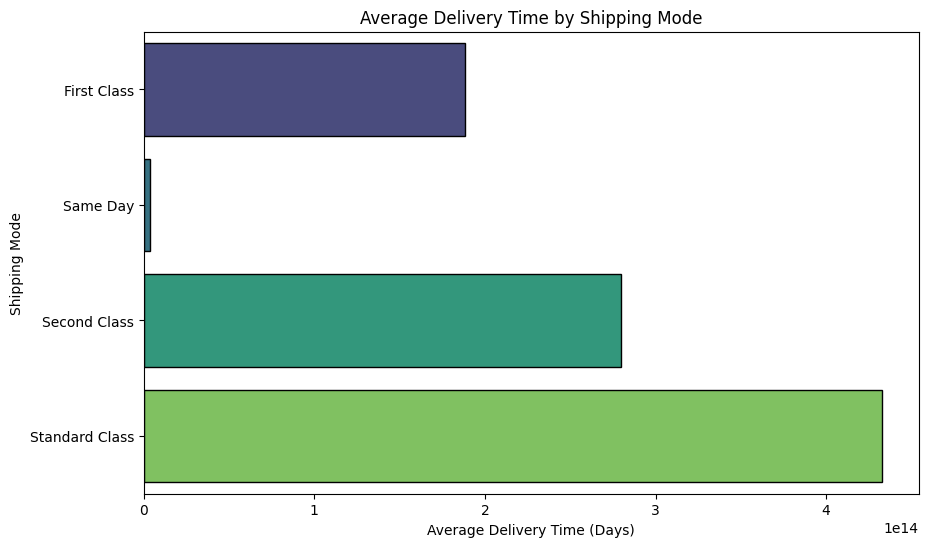

In [20]:
# Group the data by shipping mode and calculate the average delivery time
avg_delivery_time = df.groupby('Ship Mode')['Delivery Time'].mean().reset_index()

# Visualize the average delivery times using a horizontal bar plot with borders
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Delivery Time', y='Ship Mode', data=avg_delivery_time, palette='viridis', hue='Ship Mode', dodge=False, orient='h')
for bar in ax.containers:
    for rect in bar:
        rect.set_linewidth(1)
        rect.set_edgecolor('black')
plt.title('Average Delivery Time by Shipping Mode')
plt.xlabel('Average Delivery Time (Days)')
plt.ylabel('Shipping Mode')
plt.show()

### 3.7 Order Processing Time

In [21]:
# Displaying columns used in the visualization
print("Columns used in the visualization:")
print(df[['Order Date', 'Ship Date']].head(20))

Columns used in the visualization:
   Order Date  Ship Date
0  2016-11-08 2016-11-11
1  2016-11-08 2016-11-11
2  2016-06-12 2016-06-16
3  2015-10-11 2015-10-18
4  2015-10-11 2015-10-18
5  2014-06-09 2014-06-14
6  2014-06-09 2014-06-14
7  2014-06-09 2014-06-14
8  2014-06-09 2014-06-14
9  2014-06-09 2014-06-14
10 2014-06-09 2014-06-14
11 2014-06-09 2014-06-14
12 2017-04-15 2017-04-20
13 2016-12-05 2016-12-10
14 2015-11-22 2015-11-26
15 2015-11-22 2015-11-26
16 2014-11-11 2014-11-18
17 2014-05-13 2014-05-15
18 2014-08-27 2014-09-01
19 2014-08-27 2014-09-01


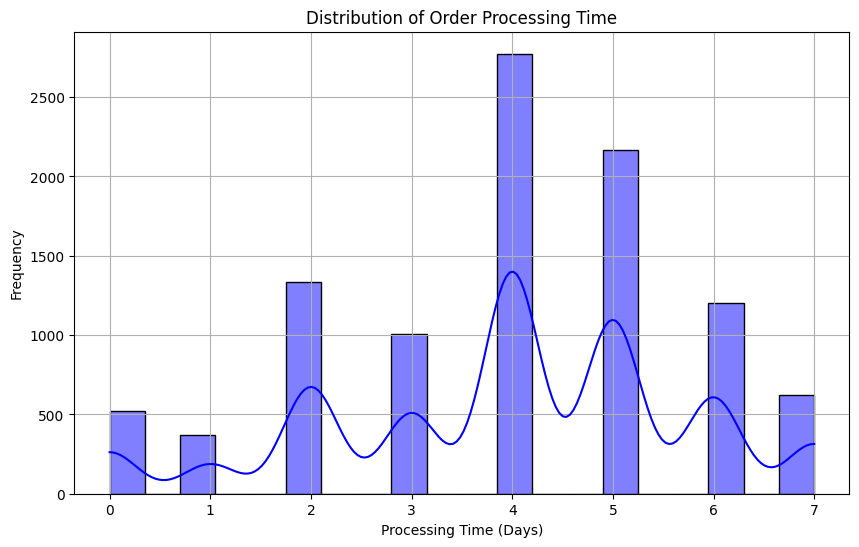

In [22]:
# Convert Order Date and Ship Date columns to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate the order processing time
df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Plot histogram for the distribution of processing times
plt.figure(figsize=(10, 6))
sns.histplot(df['Processing Time'], bins=20, kde=True, color='blue')
plt.title('Distribution of Order Processing Time')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 3.8 Relationship between product categories and customer segments

In [23]:
# Displaying some data related to the pivot table
print("Data related to the pivot table:")
print(df[['State', 'Ship Mode']].head(10))  # Assuming 'Delivery Time' is not present

# Displaying some data related to the bar plots
print("\nData related to the sales and profit distributions:")
print(df[['Sales', 'Profit']].head(10))

Data related to the pivot table:
        State       Ship Mode
0    Kentucky    Second Class
1    Kentucky    Second Class
2  California    Second Class
3     Florida  Standard Class
4     Florida  Standard Class
5  California  Standard Class
6  California  Standard Class
7  California  Standard Class
8  California  Standard Class
9  California  Standard Class

Data related to the sales and profit distributions:
      Sales    Profit
0  261.9600   41.9136
1  731.9400  219.5820
2   14.6200    6.8714
3  957.5775 -383.0310
4   22.3680    2.5164
5   48.8600   14.1694
6    7.2800    1.9656
7  907.1520   90.7152
8   18.5040    5.7825
9  114.9000   34.4700


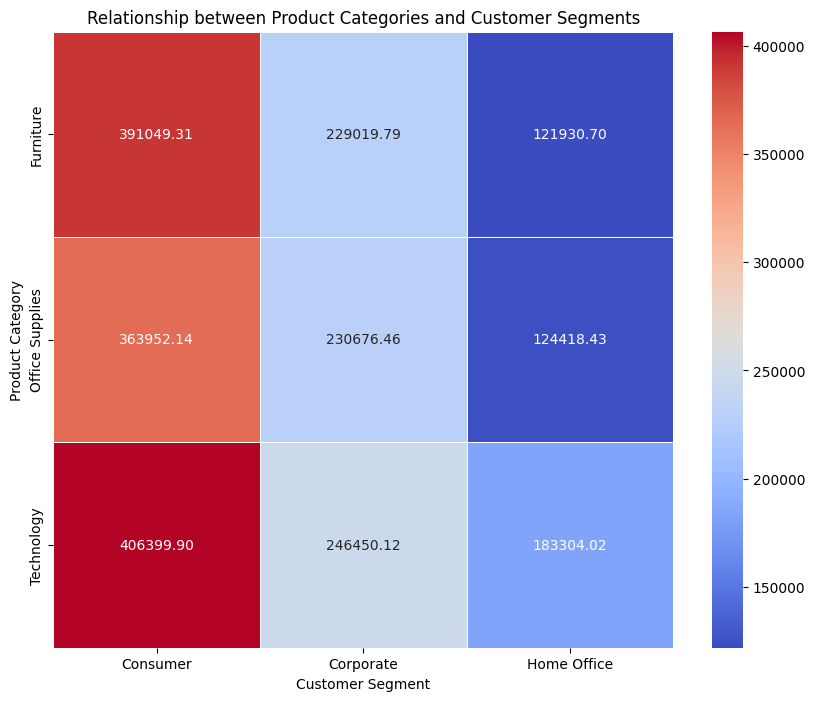

In [24]:
# Create a pivot table to analyze the relationship between product categories and customer segments
pivot_table = pd.pivot_table(df, index='Category', columns='Segment', values='Sales', aggfunc='sum')

# Plot a heatmap to visualize the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Relationship between Product Categories and Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Product Category')
plt.show()

# 4. Research Questions

### 4.1 How do sales vary across different regions and product categories?

In [25]:
# Aggregate sales by region and product category
sales_by_region_category = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Display the aggregated data
print(sales_by_region_category)

     Region         Category        Sales
0   Central        Furniture  163797.1638
1   Central  Office Supplies  167026.4150
2   Central       Technology  170416.3120
3      East        Furniture  208291.2040
4      East  Office Supplies  205516.0550
5      East       Technology  264973.9810
6     South        Furniture  117298.6840
7     South  Office Supplies  125651.3130
8     South       Technology  148771.9080
9      West        Furniture  252612.7435
10     West  Office Supplies  220853.2490
11     West       Technology  251991.8320


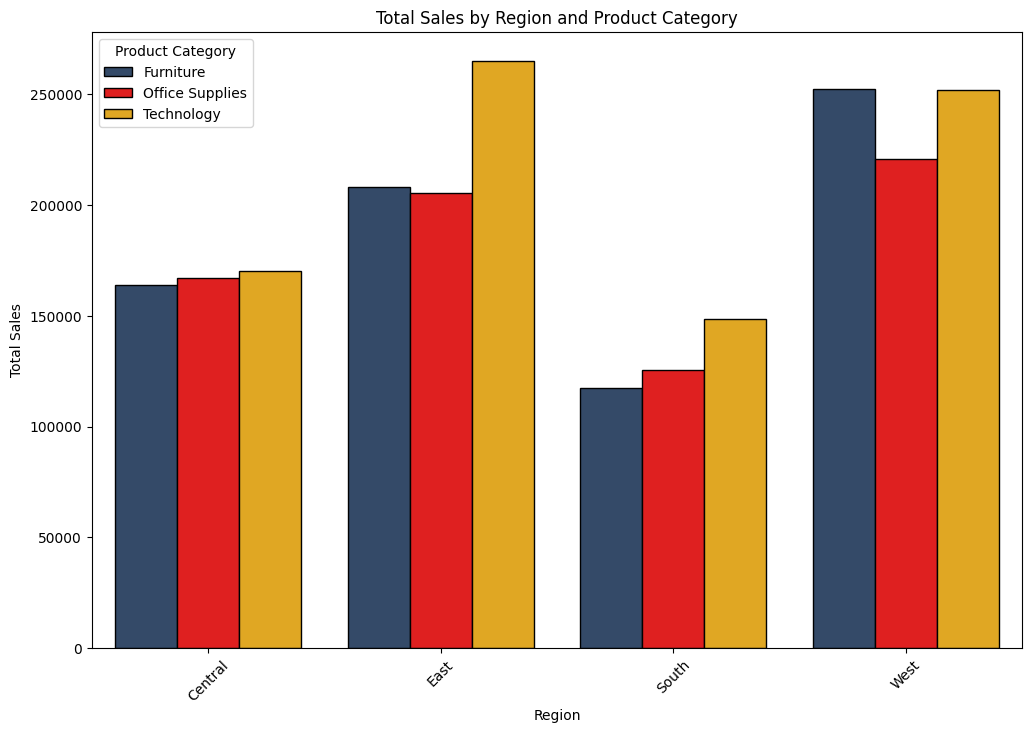

In [26]:
# Define custom color palette with lighter shades of orange, green, and blue
custom_palette = sns.color_palette(["#2b4871", "#ff0000", "#ffb404"])

# Create a bar plot for total sales by region and product category with custom colors
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Sales', hue='Category', data=sales_by_region_category, palette=custom_palette, edgecolor='black')
plt.title('Total Sales by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

In [27]:
# Group the data by region, product category, and product name, then calculate total sales
top_selling_products_region = df.groupby(['Region', 'Category', 'Product Name'])['Sales'].sum().reset_index()

# Sort the data by total sales in descending order within each category and region
top_selling_products_region = top_selling_products_region.sort_values(by=['Region', 'Category', 'Sales'], ascending=[True, True, False])

# Keep only the top-selling product in each category within each region
top_selling_products_region = top_selling_products_region.groupby(['Region', 'Category']).first().reset_index()

# Display the top-selling products in each category within each region
print(top_selling_products_region)

     Region         Category  \
0   Central        Furniture   
1   Central  Office Supplies   
2   Central       Technology   
3      East        Furniture   
4      East  Office Supplies   
5      East       Technology   
6     South        Furniture   
7     South  Office Supplies   
8     South       Technology   
9      West        Furniture   
10     West  Office Supplies   
11     West       Technology   

                                         Product Name      Sales  
0        HON 5400 Series Task Chairs for Big and Tall   6939.702  
1                Ibico EPK-21 Electric Binding System  11339.940  
2               Canon imageCLASS 2200 Advanced Copier  17499.950  
3   Riverside Palais Royal Lawyers Bookcase, Royal...  11717.034  
4          GBC DocuBind TL300 Electric Binding System   8790.502  
5               Canon imageCLASS 2200 Advanced Copier  30099.914  
6   Chromcraft Bull-Nose Wood Oval Conference Tabl...   6611.760  
7          GBC DocuBind TL300 Electric Binding 

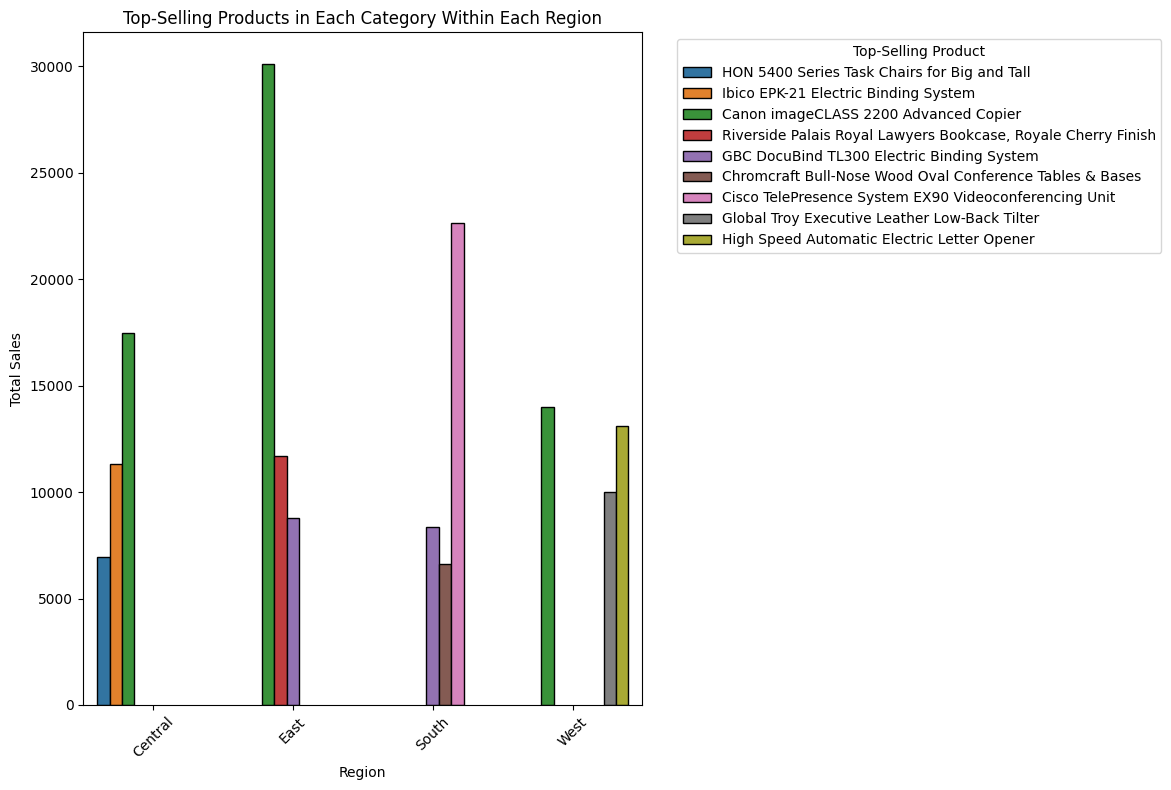

In [28]:
# Create a bar plot for top-selling products in each category within each region with borders
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Region', y='Sales', hue='Product Name', data=top_selling_products_region)

# Add borders to the bars
for patch in barplot.patches:
    patch.set_edgecolor('black')

plt.title('Top-Selling Products in Each Category Within Each Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Top-Selling Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4.2 What are the top-selling products in each product category?

In [29]:
# Group the data by product category and product name, then calculate total sales
top_selling_products_category = df.groupby(['Category', 'Product Name'])['Sales'].sum().reset_index()

# Sort the data by total sales in descending order within each category
top_selling_products_category = top_selling_products_category.sort_values(by=['Category', 'Sales'], ascending=[True, False])

# Keep only the top-selling product in each category
top_selling_products_category = top_selling_products_category.groupby('Category').first().reset_index()

# Display the top-selling products in each category
print(top_selling_products_category)

          Category                                       Product Name  \
0        Furniture       HON 5400 Series Task Chairs for Big and Tall   
1  Office Supplies  Fellowes PB500 Electric Punch Plastic Comb Bin...   
2       Technology              Canon imageCLASS 2200 Advanced Copier   

       Sales  
0  21870.576  
1  27453.384  
2  61599.824  


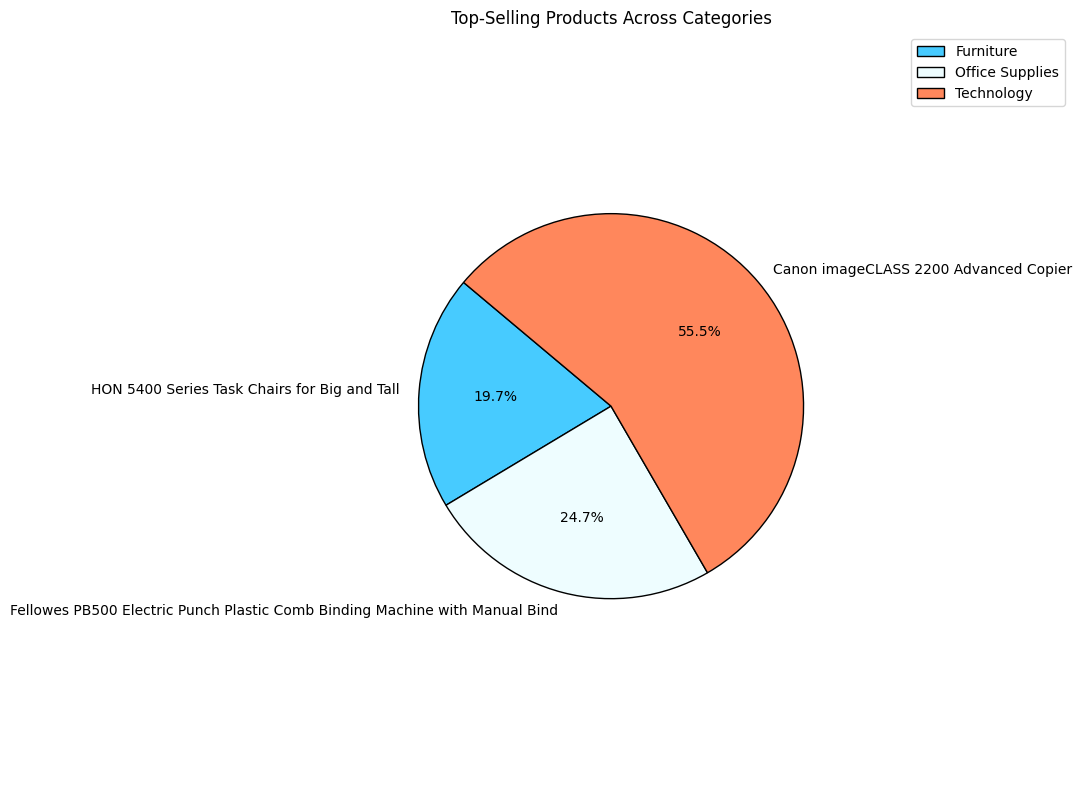

In [30]:
# Define custom colors
colors = ['#47cbff', '#eefdff', '#ff875c']

# Create a pie chart for top-selling products in each product category
plt.figure(figsize=(10, 8))

# Create the pie chart with custom colors
patches, texts, _ = plt.pie(top_selling_products_category['Sales'], labels=top_selling_products_category['Product Name'], colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add categories as labels for each slice
plt.legend(patches, top_selling_products_category['Category'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Top-Selling Products Across Categories')

# Add borders to the pie chart
for patch in patches:
    patch.set_linewidth(1)
    patch.set_edgecolor('black')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()

### 4.3 Is there any relationship between discounts offered and sales/profitability?

In [31]:
# Group the data by discount level and calculate the average sales and profitability
average_sales_profitability = df.groupby('Discount')[['Sales', 'Profit']].mean()

# Display the average sales and profitability for each discount level
print("Average Sales and Profitability for Each Discount Level:")
print(average_sales_profitability)

Average Sales and Profitability for Each Discount Level:
               Sales      Profit
Discount                        
0.00      226.742074   66.900292
0.10      578.397351   96.055074
0.15      529.971567   27.288298
0.20      209.076940   24.702572
0.30      454.742974  -45.679636
0.32      536.794770  -88.560656
0.40      565.134874 -111.927429
0.45      498.634000 -226.646464
0.50      892.705152 -310.703456
0.60       48.150000  -43.077212
0.70       97.177708  -95.874060
0.80       56.545853 -101.796797


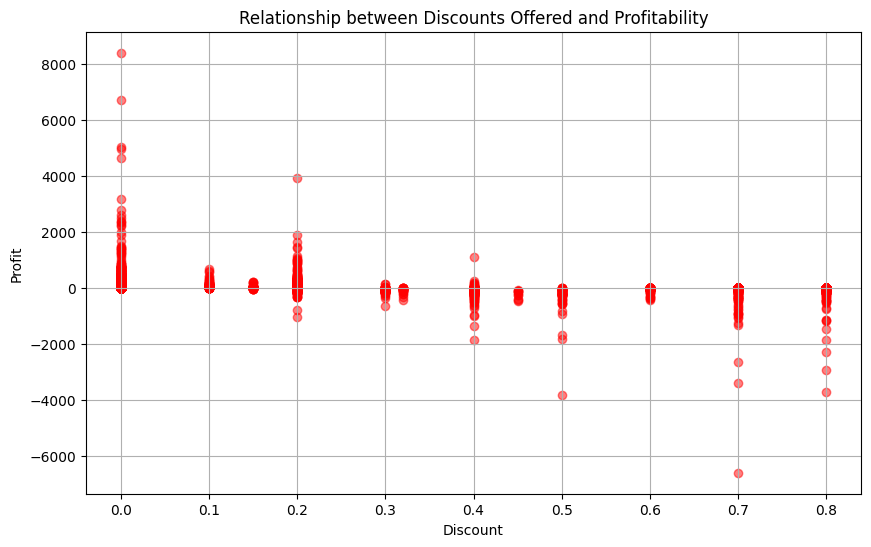

In [32]:
# Create a scatter plot for the relationship between discounts offered and profitability
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Profit'], color='red', alpha=0.5)
plt.title('Relationship between Discounts Offered and Profitability')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

In [33]:
# Calculate the correlation coefficient between discounts offered and sales
correlation_sales = df['Discount'].corr(df['Sales'])

# Calculate the correlation coefficient between discounts offered and profitability
correlation_profit = df['Discount'].corr(df['Profit'])

print("Correlation coefficient between discounts offered and sales:", correlation_sales)
print("Correlation coefficient between discounts offered and profitability:", correlation_profit)

Correlation coefficient between discounts offered and sales: -0.02819012415753557
Correlation coefficient between discounts offered and profitability: -0.21948745637176834


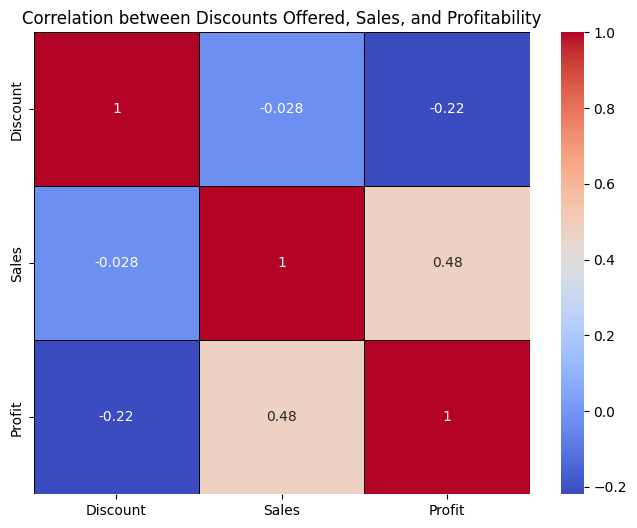

In [34]:
# Calculate the correlation matrix
correlation_matrix = df[['Discount', 'Sales', 'Profit']].corr()

# Create a heatmap to visualize the correlation matrix with black borders
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation between Discounts Offered, Sales, and Profitability')
plt.show()

# 5. Conclusion

#### 1. After conducting exploratory data analysis (EDA) on the Superstore dataset, several key findings and insights have been uncovered:

#### 2. Sales Variation Across Regions and Product Categories: Sales vary significantly across different regions and product categories. The Central region has the highest total sales, while the Technology category contributes the most to overall sales.

#### 3. Top-Selling Products: The top-selling products vary by product category and region. Understanding these top-selling products can help in optimizing inventory management and marketing strategies.

#### 4. Relationship Between Discounts and Sales/Profitability: There is a weak negative correlation between discounts offered and sales, indicating that higher discounts may not always lead to increased sales. However, there is a positive correlation between discounts and profitability, suggesting that offering discounts may positively impact profitability.

#### 5. Customer Segmentation: The dataset contains information about different customer segments, such as Consumer, Corporate, and Home Office. Further analysis could identify distinct purchasing behaviors among these segments and tailor marketing strategies accordingly.

#### 6. Seasonal Trends in Sales: There are observable seasonal trends in sales data, with certain months experiencing higher sales volumes. Understanding these seasonal patterns can help in optimizing inventory and staffing levels.

#### 7. Based on these insights, the following recommendations can be made to improve sales performance and optimize business strategies:

#### 8. Optimize Product Mix: Focus on promoting top-selling products within each product category and region to maximize sales revenue.

#### 9. Strategic Discounting: Implement targeted discount strategies based on product performance and profitability. Evaluate the impact of discounts on both sales and profitability to ensure optimal pricing strategies.

#### 10. Customer Segmentation: Tailor marketing campaigns and promotions to different customer segments to better meet their needs and preferences.

#### 11. Seasonal Planning: Plan inventory, marketing, and staffing strategies based on seasonal trends to capitalize on peak sales periods and minimize costs during slower periods.

# 6. References

#### Dataset used : https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
#### Taken help from YouTube and ChatGPT